## Voyager Token (VGX) Analyis

##### Developed by Adam Curry
##### 06/16/2021

This workbook analyzes ~16,000 Tweets that include the words "$VGX" and "investvoyager". These words should signify Tweets related to the Voyager investment company. 

In [82]:
import warnings
warnings.filterwarnings('ignore')

### Gather Tweets

In [ ]:
#https://github.com/Mottl/GetOldTweets3/issues/98
import snscrape.modules.twitter as sntwitter
import csv
maxTweets = 10000

def writeTweets():
    #Open/create a file to append data to
    csvFile = open('C:\\Users\\adamp\\OneDrive\\Desktop\\Desktop\\AAAA_FINAL_AAA\\VGX_TWEETS.csv', 'a', newline='', encoding='utf8')
    #Use csv writer
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['id','date','tweet',]) 
    #https://github.com/igorbrigadir/twitter-advanced-search
    #contains where criteria to only pull specific Tweets
    #rerun this for each year. Uncomment appropriate line.
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$VGX OR #VGX OR investvoyager + lang:en + since:2019-01-01 until:2019-12-31 + min_faves:1').get_items()):                                                        
    #for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$VGX OR #VGX OR investvoyager + lang:en + since:2020-01-01 until:2020-12-31 + min_faves:3').get_items()):                                                                                                                    
    #for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$VGX OR #VGX OR investvoyager + lang:en + since:2021-01-01 until:2021-06-01 + min_faves:10').get_items()):                                                                                                                                                                                
        if i > maxTweets :
            break  
        csvWriter.writerow([tweet.id, tweet.date, tweet.content])
    csvFile.close()

writeTweets()

#### Bring into a dataframe

In [691]:
import numpy as np
import pandas as pd

# import the VGX tweets
path =r'C:\Users\adamp\OneDrive\Desktop\Desktop\AAAA_FINAL_AAA\VGX_TWEETS.csv'
df = pd.read_csv(path,  engine='python')

In [692]:
print('Num records - ' +str(len(df.index)))

Num records - 16313


In [693]:
df.head(100)

,id,date,tweet
0,1399474378799304706,2021-05-31 21:14:27+00:00,This is encouraging... $BTC $ETH $VGX $LUNA $...
1,1399469170283225091,2021-05-31 20:53:45+00:00,Dove into the $VGX @investvoyager quarterly s...
2,1399462197277904910,2021-05-31 20:26:03+00:00,Will be awesome when @investvoyager starts off...
3,1399440560281239554,2021-05-31 19:00:04+00:00,"""As we've seen historically, there tends to be..."
4,1399420275989516292,2021-05-31 17:39:28+00:00,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...
5,1399395821511184384,2021-05-31 16:02:18+00:00,Exciting news everyone! \n\n@JonahLupton and I...
6,1399391497506729985,2021-05-31 15:45:07+00:00,Voyager currently supports 30 #cryptocurrencie...
7,1399375135564513287,2021-05-31 14:40:06+00:00,ðŸ¤ªðŸ¤ªðŸ¤ªðŸ¤ªðŸ¤ª Yes I want $VGX to grow! ...
8,1399374869146570763,2021-05-31 14:39:02+00:00,Can't wait for my $VGX interest to drop into m...
9,1399364791110602753,2021-05-31 13:58:59+00:00,$VGX $2.50 ðŸ”¥ What a beautiful day!


In [694]:
df.dtypes

id       object
date     object
tweet    object
dtype: object

In [695]:
# Remove NAN's
df.dropna(inplace=True)
print('Num records - ' +str(len(df.index)))

Num records - 16313


In [696]:
# set date to index
df.index = pd.to_datetime(df['date'],errors='coerce', format='%Y-%m-%d')

In [697]:
df.head()

,id,date,tweet
date,,,
2021-05-31 21:14:27+00:00,1399474378799304706,2021-05-31 21:14:27+00:00,This is encouraging... $BTC $ETH $VGX $LUNA $...
2021-05-31 20:53:45+00:00,1399469170283225091,2021-05-31 20:53:45+00:00,Dove into the $VGX @investvoyager quarterly s...
2021-05-31 20:26:03+00:00,1399462197277904910,2021-05-31 20:26:03+00:00,Will be awesome when @investvoyager starts off...
2021-05-31 19:00:04+00:00,1399440560281239554,2021-05-31 19:00:04+00:00,"""As we've seen historically, there tends to be..."
2021-05-31 17:39:28+00:00,1399420275989516292,2021-05-31 17:39:28+00:00,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...


Text(0, 0.5, '# Tweets')

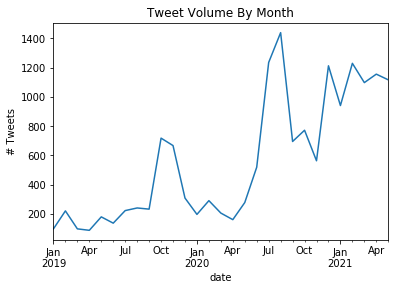

In [698]:
# quick image of volume
import matplotlib.pyplot as plt

df_summary = df.groupby([pd.TimeGrouper('M')]).count()
df_summary=df_summary['id']
df_summary.plot(legend=False)
plt.title('Tweet Volume By Month')
plt.ylabel('# Tweets')

Interesting that there was a massive spike in volume back in 07/2020.
TODO - see how this correlates to the price at the time. 

#### Bot Cleanup
Find dups. This will weed out potential bots that post on Twitter to inflate coin prices

In [699]:
# create a copy of the original dataframe. Parse out dups for potential bots
df_sub = df.copy()

In [700]:
df_sub = df_sub[['tweet']]

In [701]:
df_sub['dup_tweet'] = df_sub[df_sub.duplicated()]
  
print("Duplicate Rows :" + str(duplicate))

print("TOTAL DUPS: " + str(duplicate.count()))

Duplicate Rows :                                                                       tweet
date                                                                        
2021-05-05 20:02:42+00:00  The Voyager app is now back online and trading...
2021-03-24 21:43:26+00:00  Disclaimer: Top 3 memes will win. All memes su...
2021-03-22 21:16:43+00:00  Disclaimer: Top 3 memes will win. All memes su...
2021-03-14 21:12:29+00:00  Disclaimer continued: To register, you must be...
2021-02-26 19:14:40+00:00  Giveaway starts on 2/17/21 at 3:00 pm EST &amp...
2021-02-25 22:28:35+00:00  Giveaway starts on 2/17/21 at 3:00 pm EST &amp...
2021-02-22 22:17:52+00:00  Giveaway starts on 2/17/21 at 3:00 pm EST &amp...
2021-02-20 21:59:58+00:00  Giveaway starts on 2/17/21 at 3:00 pm EST &amp...
2020-10-30 14:04:27+00:00  Riding the #DigitalAssets Wave - #VoyagerDigit...
2020-07-27 19:43:20+00:00             Tune in here - https://t.co/P2DKk1YIVt
2020-07-05 18:57:21+00:00  Delete Coinbase and trade $100 to

In [702]:
# join the two, keeping all of df1's indices
df_dedup = pd.merge(df, df_sub, left_index=True, right_index=True)

In [703]:
df_dedup

,id,date,tweet_x,tweet_y,dup_tweet
date,,,,,
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
2019-01-01 05:00:19+00:00,1079965521980940288,2019-01-01 05:00:19+00:00,Happy New Year to all! 2019 is going to be a b...,Happy New Year to all! 2019 is going to be a b...,NaN
2019-01-01 14:15:11+00:00,1080105157491339265,2019-01-01 14:15:11+00:00,You asked. We answered. The Voyager referral p...,You asked. We answered. The Voyager referral p...,NaN
2019-01-01 14:16:15+00:00,1080105426644025344,2019-01-01 14:16:15+00:00,The program will end on 01/15,The program will end on 01/15,NaN
2019-01-01 17:18:53+00:00,1080151388514992128,2019-01-01 17:18:53+00:00,#Investvoyager ðŸ“¢\n\nGet $25 in Bitcoin ðŸ’°...,#Investvoyager ðŸ“¢\n\nGet $25 in Bitcoin ðŸ’°...,NaN
2019-01-01 22:03:35+00:00,1080223032113803268,2019-01-01 22:03:35+00:00,@investvoyager When is the app launching ????,@investvoyager When is the app launching ????,NaN


In [704]:
df_dedup.dropna(inplace=True)
df_dedup[pd.notnull(df_dedup.index)]
print('Num records - ' +str(len(df_dedup.index)))

Num records - 25


In [705]:
# view all the duplicate values
df_dedup

,id,date,tweet_x,tweet_y,dup_tweet
date,,,,,
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
NaT,id,date,tweet,tweet,tweet
2019-05-22 12:01:17+00:00,1131168147854303232,2019-05-22 12:01:17+00:00,The entire team @WallStreetBTC is proud to ann...,The entire team @WallStreetBTC is proud to ann...,The entire team @WallStreetBTC is proud to ann...
2019-07-05 17:07:46+00:00,1147190345710489605,2019-07-05 17:07:46+00:00,Where are you at in the 5 stages of bitcoin?\n...,Where are you at in the 5 stages of bitcoin?\n...,Where are you at in the 5 stages of bitcoin?\n...
2019-08-20 17:46:03+00:00,1163869822083653633,2019-08-20 17:46:03+00:00,"@investvoyager Awesome !\n\n@PhanHun00135217 ,...","@investvoyager Awesome !\n\n@PhanHun00135217 ,...","@investvoyager Awesome !\n\n@PhanHun00135217 ,..."
2019-10-28 15:37:33+00:00,1188842245803237376,2019-10-28 15:37:33+00:00,@investvoyager I'm inviting you to start inves...,@investvoyager I'm inviting you to start inves...,@investvoyager I'm inviting you to start inves...
2019-12-10 16:38:17+00:00,1204440207136870401,2019-12-10 16:38:17+00:00,@investvoyager When #ny?,@investvoyager When #ny?,@investvoyager When #ny?


In [706]:
# remove dups from original dataframe
df = df[df.index.isin(df_dedup.index)== False]

In [707]:
print('Num records - ' +str(len(df.index)))

Num records - 16290


####  Clean, remove stop words, apply lemmatization

In [708]:
import nltk
# remove hyper links from data
df['content_cleanLinks'] = df['tweet'].replace(
        r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
# remove hastags links from data
df['contents_hashtags'] = df['content_cleanLinks'].replace(r'#.*?(?=\s|$)', '', regex=True)
# remove Tweets @ anybody and any digits
df['contents_at'] = df['contents_hashtags'].replace(r'@.*?(?=\s|$)', '', regex=True).replace('\d+', ' ', regex=True)

In [709]:
import re
# remove gibberish 
df['contents_gibberish'] = df['contents_at'].map(lambda x: re.sub(r'\W+', ' ', x))

In [710]:
import string

def remove_punctuations(text):
    """
    remove punct and lower case all text
    """
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').lower()
        #stemmer.stem(text)
    return text

df['content_no_punk'] = df['contents_gibberish'].apply(remove_punctuations)

In [711]:
#remove non English Words from dataframe
#nltk.download('words')
#words = set(nltk.corpus.words.words())
#https://stackoverflow.com/questions/52787309/removing-nonsense-words-in-python

def clean(t):
    return " ".join(w for w in nltk.wordpunct_tokenize(t) \
     if w.lower() in words or not w.isalpha())

df['ctweets'] = df['content_no_punk'].apply(clean)

Next I want to count the number of tokens. This will help me add my own stop words to omit form the topic model. 

In [712]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['ctweets']), axis=1)

put tokens into a list and count the frequency

In [713]:
big_list = []
for _, row in df.iterrows():
    for i in row.tokenized_sents:
        big_list.append(i)

In [714]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

add customer stop words.

In [715]:
cust_stop_words = ['voyager','VGX','luna','ocean','ï¼š','³ðÿš','dot','link','band','aion','cro']
for a in cust_stop_words:
    stop_words.add(a)

remove new list of stop words

In [716]:
big_list_no_stops = []
for r in big_list:
    if not r in stop_words:
        big_list_no_stops.append(r)

View the frequency of each word

In [717]:
from collections import Counter
print(Counter(big_list_no_stops))

Counter({'get': 1350, 'interest': 1306, 'buy': 1074, 'token': 1005, 'like': 1002, 'market': 908, 'us': 873, 'one': 869, 'time': 857, 'new': 838, 'trading': 753, 'see': 751, 'today': 735, 'free': 732, 'know': 709, 'great': 689, 'trade': 683, 'going': 675, 'people': 664, 'would': 628, 'thanks': 626, 'k': 620, 'top': 597, 'price': 588, 'good': 582, 'still': 573, 'go': 568, 'next': 567, 'soon': 545, 'day': 534, 'best': 533, 'coming': 525, 'use': 525, 'make': 505, 'x': 503, 'back': 474, 'love': 472, 'earn': 471, 'team': 462, 'read': 459, 'week': 445, 'assets': 444, 'platform': 432, 'think': 428, 'check': 426, 'live': 425, 'long': 423, 'thank': 421, 'utility': 420, 'look': 417, 'want': 416, 'money': 407, 'also': 407, 'take': 404, 'big': 400, 'broker': 398, 'digital': 397, 'year': 397, 'right': 394, 'much': 386, 'first': 377, 'coin': 375, 'future': 374, 'community': 374, 'learn': 369, 'start': 368, 'last': 368, 'even': 365, 'keep': 363, 'account': 361, 'way': 361, 'hold': 358, 'commission': 3

remove the stop words

In [718]:
df['ctweets_no_stops'] = df['ctweets'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))

In [719]:
df.head()

,id,date,tweet,content_cleanLinks,contents_hashtags,contents_at,contents_gibberish,content_no_punk,ctweets,tokenized_sents,ctweets_no_stops
date,,,,,,,,,,,
2021-05-31 21:14:27+00:00,1399474378799304706,2021-05-31 21:14:27+00:00,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging BTC ETH VGX LUNA OCEAN STM...,this is encouraging btc eth vgx luna ocean stm...,this is encouraging luna ocean,"[this, is, encouraging, luna, ocean]",encouraging
2021-05-31 20:53:45+00:00,1399469170283225091,2021-05-31 20:53:45+00:00,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX quarterly statements. Am...,Dove into the VGX quarterly statements Am I re...,dove into the vgx quarterly statements am i re...,dove into the quarterly am i reading this righ...,"[dove, into, the, quarterly, am, i, reading, t...",dove quarterly reading right hold enough cover...
2021-05-31 20:26:03+00:00,1399462197277904910,2021-05-31 20:26:03+00:00,Will be awesome when @investvoyager starts off...,Will be awesome when @investvoyager starts off...,Will be awesome when @investvoyager starts off...,Will be awesome when starts offering IRAs so ...,Will be awesome when starts offering IRAs so I...,will be awesome when starts offering iras so i...,will be awesome when offering so i can accrue ...,"[will, be, awesome, when, offering, so, i, can...",awesome offering accrue interest tax free
2021-05-31 19:00:04+00:00,1399440560281239554,2021-05-31 19:00:04+00:00,"""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...",As we ve seen historically there tends to be ...,as we ve seen historically there tends to be ...,as we seen historically there to be trading ac...,"[as, we, seen, historically, there, to, be, tr...",seen historically trading activity days leadin...
2021-05-31 17:39:28+00:00,1399420275989516292,2021-05-31 17:39:28+00:00,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,Would love to meet up.,Would love to meet up,would love to meet up,would love to meet up,"[would, love, to, meet, up]",would love meet


In [720]:
# apply lemmatization
from nltk.corpus import wordnet

# add the models to an object
lemmatizer = nltk.stem.WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    """
    apply part of speech tagging
    """
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def lemmatize_sentence(sentence):
    """
    apply part of speech tagging and lemmatization to get the base form of the word
    """
    global wordnet_tagged
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [721]:
# Lemmatizing
df['Lemmatized'] = df['ctweets_no_stops'].apply(lambda x: lemmatize_sentence(x))
# only on larger words
#df = df[df['Lemmatized'].apply(lambda x: len(x) > 10)]
df.head()

,id,date,tweet,content_cleanLinks,contents_hashtags,contents_at,contents_gibberish,content_no_punk,ctweets,tokenized_sents,ctweets_no_stops,Lemmatized
date,,,,,,,,,,,,
2021-05-31 21:14:27+00:00,1399474378799304706,2021-05-31 21:14:27+00:00,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging... $BTC $ETH $VGX $LUNA $...,This is encouraging BTC ETH VGX LUNA OCEAN STM...,this is encouraging btc eth vgx luna ocean stm...,this is encouraging luna ocean,"[this, is, encouraging, luna, ocean]",encouraging,encourage
2021-05-31 20:53:45+00:00,1399469170283225091,2021-05-31 20:53:45+00:00,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX @investvoyager quarterly s...,Dove into the $VGX quarterly statements. Am...,Dove into the VGX quarterly statements Am I re...,dove into the vgx quarterly statements am i re...,dove into the quarterly am i reading this righ...,"[dove, into, the, quarterly, am, i, reading, t...",dove quarterly reading right hold enough cover...,dive quarterly reading right hold enough cover...
2021-05-31 20:26:03+00:00,1399462197277904910,2021-05-31 20:26:03+00:00,Will be awesome when @investvoyager starts off...,Will be awesome when @investvoyager starts off...,Will be awesome when @investvoyager starts off...,Will be awesome when starts offering IRAs so ...,Will be awesome when starts offering IRAs so I...,will be awesome when starts offering iras so i...,will be awesome when offering so i can accrue ...,"[will, be, awesome, when, offering, so, i, can...",awesome offering accrue interest tax free,awesome offering accrue interest tax free
2021-05-31 19:00:04+00:00,1399440560281239554,2021-05-31 19:00:04+00:00,"""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...","""As we've seen historically, there tends to be...",As we ve seen historically there tends to be ...,as we ve seen historically there tends to be ...,as we seen historically there to be trading ac...,"[as, we, seen, historically, there, to, be, tr...",seen historically trading activity days leadin...,see historically trading activity day lead exp...
2021-05-31 17:39:28+00:00,1399420275989516292,2021-05-31 17:39:28+00:00,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,@Ehrls15 @TheBitcoinConf @MarketRebels @invest...,Would love to meet up.,Would love to meet up,would love to meet up,would love to meet up,"[would, love, to, meet, up]",would love meet,would love meet


In [778]:
df_cleaned = df.copy()

In [779]:
df_cleaned['Tweets'] = df_cleaned['Lemmatized']

In [780]:
df_cleaned = df_cleaned[['id','date','Tweets']]
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'],errors='coerce', format='%Y-%m-%d')

In [781]:
df_cleaned.dtypes

id                     object
date      datetime64[ns, UTC]
Tweets                 object
dtype: object

In [782]:
df_cleaned.head()

,id,date,Tweets
date,,,
2021-05-31 21:14:27+00:00,1399474378799304706,2021-05-31 21:14:27+00:00,encourage
2021-05-31 20:53:45+00:00,1399469170283225091,2021-05-31 20:53:45+00:00,dive quarterly reading right hold enough cover...
2021-05-31 20:26:03+00:00,1399462197277904910,2021-05-31 20:26:03+00:00,awesome offering accrue interest tax free
2021-05-31 19:00:04+00:00,1399440560281239554,2021-05-31 19:00:04+00:00,see historically trading activity day lead exp...
2021-05-31 17:39:28+00:00,1399420275989516292,2021-05-31 17:39:28+00:00,would love meet


## Begin Topic Model

This step was added to do a gut check on the data. I wanted to see if these topics were in line with what I'd expect over the years, given my domain knowledge of the subject. 

#### Vectorize the dataset

In [727]:
#### TF-IDF Vectorization to create a vectorized document term matrix.
from sklearn.feature_extraction.text import TfidfVectorizer

# remove stop words, apply vecorization of bigrams ranging 3-5
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(2,3))#, stop_words='english')
"""
max_df = When building the vocabulary ignore terms that have a document frequency strictly higher 
than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter 
represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
"""
dtm = tfidf.fit_transform(df_cleaned['Tweets'])
print(dtm)

  (1, 6697)	0.40538286963390957
  (1, 4040)	0.4910023827574226
  (1, 2061)	0.33528302877863797
  (1, 4556)	0.4910023827574226
  (1, 13555)	0.4910023827574226
  (2, 169)	1.0
  (3, 3683)	0.7071067811865476
  (3, 16988)	0.7071067811865476
  (4, 18837)	1.0
  (5, 8367)	0.5876096502167795
  (5, 17874)	0.6057629388334727
  (5, 4987)	0.5364384036475657
  (6, 3871)	0.4318930900240742
  (6, 924)	0.3937731525195721
  (6, 18544)	0.4189502712873244
  (6, 3870)	0.331403758143214
  (6, 17137)	0.4318930900240742
  (6, 3509)	0.4318930900240742
  (7, 18086)	0.687522356155138
  (7, 18996)	0.726163211535043
  (8, 7989)	0.3664002773914272
  (8, 5463)	0.339944466997518
  (8, 8005)	0.3664002773914272
  (8, 6214)	0.25019796046452836
  (8, 9070)	0.3025085032163255
  :	:
  (16286, 14370)	0.29503993414461327
  (16286, 4276)	0.29503993414461327
  (16286, 3424)	0.29503993414461327
  (16286, 6126)	0.29503993414461327
  (16286, 4275)	0.29503993414461327
  (16286, 3423)	0.29503993414461327
  (16286, 11272)	0.24769572

In [728]:
# utilize the non-negative matrix feature
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=15,random_state=24)
nmf_model.fit(dtm)
# PRINT THE TOP 15 WORD OF EACH TWEET
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
['android invite start', 'code get', 'invite start', 'invite start trade', 'start trade', 'start trade get', 'code claim', 'use code claim', 'free use code', 'free use', 'get free use', 'trade get', 'trade get free', 'get free', 'use code']


THE TOP 15 WORDS FOR TOPIC #2
['come one', 'exchange asset', 'send us', 'interest earn', 'digital asset', 'digital asset broker', 'publicly asset broker', 'get publicly asset', 'us get publicly', 'publicly asset', 'get publicly', 'asset broker day', 'broker day', 'us get', 'asset broker']


THE TOP 15 WORDS FOR TOPIC #3
['bat buy', 'good way', 'compare gain', 'money go', 'send good', 'use want', 'thanks amaze', 'great game', 'thanks good', 'know support', 'think big', 'like check', 'good luck everyone', 'luck everyone', 'good luck']


THE TOP 15 WORDS FOR TOPIC #4
['earn interest hold', 'hold earn', 'free earn', 'free earn interest', 'earn interest month', 'interest month', 'interest hold', 'earn interest top', 'inter

Add the topics back to the original data set and do some additional cleaning.
add all topics to a list to append to the dataframe.
Start with adding the dictionary components to a list

In [803]:
# borrowed form my assignment on Trump Tweets from DSC550
topic_results = nmf_model.transform(dtm)    

topic_results.argmax(axis=1)

# attach the data to the original dataframe
df_cleaned['Topic'] = topic_results.argmax(axis=1)

# add all topics to a list to append to the dataframe
top_2 = []
for i, topic in enumerate(nmf_model.components_):
    dct = {i: None}
    for item in topic.argsort()[-2:]:
        dct[i] = tfidf.get_feature_names()[item]
    top_2.append(dct)
    
# add to a dictionary to join on topic #
dct = {}
for i, t in enumerate(top_2):
    dct.update({i: t})

# get the values from each dictionary and place into dataframe
df_cleaned["Top_2"] = df_cleaned["Topic"].apply(lambda x: dct.get(x))       

# create just the values with no keys to a list
df_top2 = []
for k, v in df_cleaned["Top_2"].items():
    df_top2.append(*v.values())

In [784]:
# merge the two together
df_cleaned['topic_top_2'] = df_top2
# create a YYYYMM and YYYY for easier date recognition
df_cleaned['Date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['YYYYMM'] = df_cleaned.Date.apply(lambda x: x.strftime('%Y%m')).astype(int)
df_cleaned['YYYY'] = df_cleaned.Date.apply(lambda x: x.strftime('%Y')).astype(int)
#rename
df_cleaned['topic_id'] = df_cleaned['Topic']
df_cleaned['topic_desc'] = df_cleaned['topic_top_2']
#drop
del df_cleaned['topic_top_2']
del df_cleaned['Topic']
del df_cleaned['Top_2']

df_cleaned.head()

,id,date,Tweets,Date,YYYYMM,YYYY,topic_id,topic_desc
date,,,,,,,,
2021-05-31 21:14:27+00:00,1399474378799304706,2021-05-31 21:14:27+00:00,encourage,2021-05-31 21:14:27+00:00,202105,2021,0,use code
2021-05-31 20:53:45+00:00,1399469170283225091,2021-05-31 20:53:45+00:00,dive quarterly reading right hold enough cover...,2021-05-31 20:53:45+00:00,202105,2021,7,buy dip
2021-05-31 20:26:03+00:00,1399462197277904910,2021-05-31 20:26:03+00:00,awesome offering accrue interest tax free,2021-05-31 20:26:03+00:00,202105,2021,3,earn interest
2021-05-31 19:00:04+00:00,1399440560281239554,2021-05-31 19:00:04+00:00,see historically trading activity day lead exp...,2021-05-31 19:00:04+00:00,202105,2021,9,market cap
2021-05-31 17:39:28+00:00,1399420275989516292,2021-05-31 17:39:28+00:00,would love meet,2021-05-31 17:39:28+00:00,202105,2021,14,loyalty program


In [785]:
print("\nSummarized Data")
print(df_cleaned['topic_desc'].describe(include=['O']))

print("\nTop topics")
print(df_cleaned['topic_desc'].value_counts())


Summarized Data
count               16290
unique                 15
top       loyalty program
freq                 3447
Name: topic_desc, dtype: object

Top topics
loyalty program    3447
use code           3342
long term          2070
commission free    1330
market cap         1212
week market         976
earn interest       893
great work          853
come soon           810
buy dip             485
look forward        481
good luck           168
asset broker         86
top average          75
week review          62
Name: topic_desc, dtype: int64


In [786]:
df_topic = df_cleaned.copy()

# ********END TOPIC MODEL********

### begin sentiment analysis

this will be done two ways to test the disparity between the two senitment algorithms. 

In [451]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

determine if the Tweets are positive or negative

In [866]:
def polarity_scores(text):
    """
    remove punct and apply stemming and lower case all text
    https://towardsdatascience.com/sentiment-analysis-of-tweets-167d040f0583
    """
    pscore=analyzer.polarity_scores(text)
    return pscore

df_topic['p_score'] = df_topic['Tweets'].apply(polarity_scores)

Join the columns back to the cleaned dataframe and drop unneeded columns

In [867]:
df_concat = pd.concat([df_topic.drop(['p_score'], axis=1), df_topic['p_score'].apply(pd.Series)], axis=1)

In [868]:
#df_concat = pd.concat([df_cleaned, df2], axis=1)
del df_concat['neg']
del df_concat['pos']
del df_concat['neu']
df_concat['v1_compound'] = df_concat['compound']
df_concat['v1_compound_desc'] = df_concat['v1_compound'].apply(lambda c: 'Positive' if c >=0 else 'Negative')
del df_concat['compound']


In [859]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [869]:
df_concat['v_scores'] = df_concat['Tweets'].apply(lambda Tweets: sid.polarity_scores(Tweets))

In [870]:
df_concat['v2_compound']  = df_concat['v_scores'].apply(lambda v_scores: v_scores['compound'])

In [871]:
df_concat['v2_compound_desc'] = df_concat['v2_compound'].apply(lambda c: 'Positive' if c >=0 else 'Negative')

In [872]:
del df_concat['v_scores']
del df_concat['date']
df_concat.head()

,id,Tweets,Date,YYYYMM,YYYY,topic_id,topic_desc,v1_compound,v1_compound_desc,v2_compound,v2_compound_desc
0,1399474378799304706,encourage,2021-05-31 21:14:27+00:00,202105,2021,0,use code,0.5106,Positive,0.5106,Positive
1,1399469170283225091,dive quarterly reading right hold enough cover...,2021-05-31 20:53:45+00:00,202105,2021,7,buy dip,-0.1027,Negative,-0.1027,Negative
2,1399462197277904910,awesome offering accrue interest tax free,2021-05-31 20:26:03+00:00,202105,2021,3,earn interest,0.8860,Positive,0.8860,Positive
3,1399440560281239554,see historically trading activity day lead exp...,2021-05-31 19:00:04+00:00,202105,2021,9,market cap,0.0000,Positive,0.0000,Positive
4,1399420275989516292,would love meet,2021-05-31 17:39:28+00:00,202105,2021,14,loyalty program,0.6369,Positive,0.6369,Positive


In [762]:
from pandasql import sqldf

In [763]:
# https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341
"""After you’ve imported everything, it’s a good idea to write a quick lambda function that can make writing your
queries easier. The reason for doing this is so that you don’t have to pass in global variables every time an object is used. 
Below is the lambda function that I was taught and have success with:"""
pysqldf = lambda q: sqldf(q, globals())

This initial query will see the difference between the two algorithms

In [873]:
q = """SELECT
            v2_compound_desc
            ,v1_compound_desc
            /*,CASE WHEN v1_compound_desc <> v2_compound_desc THEN 1 ELSE 0 END AS DIFF_*/
            ,COUNT(*) AS DIFF_
       FROM df_concat
        GROUP BY 1,2
;"""

pysqldf(q)

,v2_compound_desc,v1_compound_desc,DIFF_
0,Negative,Negative,1438
1,Negative,Positive,8
2,Positive,Negative,5
3,Positive,Positive,14839


There are not very many differences. This seems to indicate the two are similar. But to be sure, this next query will check to see if the original Tweets line up. 

In [768]:
df_orig = pd.read_csv(path,  engine='python')

In [894]:
 q = """SELECT
            a.v1_compound_desc
            ,a.v2_compound_desc
            ,b.tweet as orig_tweet
       FROM df_concat a
       INNER JOIN df_orig b ON a.id = b.id
       where v1_compound_desc <> v2_compound_desc
;"""

df_compare= pysqldf(q)

the results are super interesting. Some of these Tweets could easily be viewed as negative, while others are neutral. Both algorithms appear to be mislabeling the tweets. 

In [904]:
 pd.options.display.max_colwidth= 1000

In [905]:
(df_compare)

,v1_compound_desc,v2_compound_desc,orig_tweet
0,Negative,Positive,"I AM NEVER TURNING DOWN OVERTIME AGAIN! ðŸ¤‘\nDo your worst tomorrow Timmy, do your fucking worst. $VGX"
1,Positive,Negative,Iâ€™m going to have a fucking heart attack looking at my bag $VGX https://t.co/ziDdKBJgV6
2,Positive,Negative,"@Ehrls15 @investvoyager Stephen. This lack of readiness is costing your customers a massive amount of money as our investments cannot be executed due to your lack execution. This is not going to be good. You have $10K, 5 ETH in pending for over 25 hours and I'm losing money because of you"
3,Positive,Negative,30 k followers.. but i wont shill y dogecoin\n\nI shilled u \n\n$BQX $VGX \nX50 against btc. Best performer on binance\n$LUNA at 0.25\nTrading at $1.5 USDT \n$MIR at 1.5. \nTradinf at $5\n\nRunning the cryptowallstreet discord \nðŸš€\nðŸ‘‡ðŸ‘‡ðŸ‘‡ðŸ‘‡ðŸ‘‡\n\n#wallstreetbets\n$OCEAN $LUNA $MIR $FET $VIDT https://t.co/aV7TQud2qU
4,Negative,Positive,"@presidentLevii @investvoyager Nope. Thats not right. I would never invest anything I canâ€™t lose. Hereâ€™s the thing though...I havenâ€™t lost a cent today...at least not over the last four hours. Itâ€™s been lost for me without my control or consent because Iâ€™ve had no access to it. Big difference, my friend."
5,Positive,Negative,$FET USDT chart\n\n0.35 soon and then TELEPORT to 0.55\n\nDont listen fine.. U will mis this like U passed on $VGX $BQX \n\nFEWWW https://t.co/CfgDIE9GOB
6,Negative,Positive,@TheTradingTramp Without a doubt... This is the time to accumulate the hell out of it... look at $VGX stock $VYGVF. There is NO DOUBT in my mind that the coin price will follow. The completion of 3rd party $LGO audit sends us to a new price discovery zone imo!!
7,Positive,Negative,"Update: We never closed above 0.18, but it's looking like we may get another chance soon. \n\nLots of bullish news lately on $VGX and the stock has been pumping like crazy.\n\nOnly a matter of time.. https://t.co/xuComGhfBs"
8,Negative,Positive,Which exchange do you guys recommend for the newbies ? \n\n(I dont recommend #HitBTC )\n\nI recommend @binance @coinbase @cryptocom @UpholdInc and @investvoyager
9,Positive,Negative,"@TheCryptoDog @binance $BQX (new ticker $VGX) without a doubt. \n\n-Crypto broker that gives you best market price by searching all exchanges\n-ZERO fees\n-USA has a 5 star app in the appstore, Canada starting &amp; Europe in few months\n-Big american company with their own stocks also ðŸ˜‰"


This next step is just a gut check on some of the positive sentiment labels. Check the top 50 results show promising labels. It appears all of these are either neutral or positive.  

In [907]:
 q = """SELECT
            a.v1_compound_desc
            ,a.v2_compound_desc
            ,b.tweet as orig_tweet
       FROM df_concat a
       INNER JOIN df_orig b ON a.id = b.id
       where v2_compound_desc = 'Positive'
;"""

df_compare2 = pysqldf(q)

In [912]:
df_compare2.head(50)

,v1_compound_desc,v2_compound_desc,orig_tweet
0,Positive,Positive,This is encouraging... $BTC $ETH $VGX $LUNA $OCEAN $STMX ðŸš€ðŸš€ðŸš€\n\nhttps://t.co/voDX2UfV7f
1,Positive,Positive,Will be awesome when @investvoyager starts offering IRAs so I can accrue interest tax free on $VGX $USDC $ADA #ETH #BTC etc!
2,Positive,Positive,"""As we've seen historically, there tends to be increased trading activity in the days leading up to a bitcoin expiry.""\n\nWondering what all this flux in BTC means for the market? #Voyager CEO @Ehrls15 weighed in with @Forbes.\n\nRead here: https://t.co/zvcpHfUUuL"
3,Positive,Positive,@Ehrls15 @TheBitcoinConf @MarketRebels @investvoyager Would love to meet up.
4,Positive,Positive,"Exciting news everyone! \n\n@JonahLupton and I will be meeting with the CEO of @investvoyager, Steve @Ehrls15, over Zoom where we will record the video and post it on our YouTube channels.\n\nMark June 8th on your calendar!"
5,Positive,Positive,Voyager currently supports 30 #cryptocurrencies for transfer on the #Voyager app ðŸ¤�\n\nSee which coins are supported and how to deposit and withdraw assets.\n\nLearn more: https://t.co/rYaQANt8gp https://t.co/tB7vewE4Gh
6,Positive,Positive,ðŸ¤ªðŸ¤ªðŸ¤ªðŸ¤ªðŸ¤ª Yes I want $VGX to grow! @Ehrls15 @investvoyager ðŸ”¥ðŸ”¥ðŸ”¥ðŸ”¥ðŸš€ðŸš€ðŸš€ðŸ˜�ðŸ˜�ðŸ˜�â�¤ï¸� https://t.co/eH6cMbiyEe
7,Positive,Positive,Can't wait for my $VGX interest to drop into my account on @investvoyager! Looking like I'll be getting 73 $VGX in interest for the first month of 7%!
8,Positive,Positive,$VGX $2.50 ðŸ”¥ What a beautiful day!
9,Positive,Positive,Ok. I have it on good authorityâ€¦\n\n1) @coinexcom did the listing on their own.\n\n2) This WILL NOT affect the swap in any bad way.\n\nNow Iâ€™m good with it all.\n\nCarry on!\n\n#VGX #BQX #VYGVF $VGX $BQX $VYGVF #VLP $BITQ


And now the same is done for negative sentiment. These results are mixed. I see a lot of what could be interpreted as positive, due to a lack of context. For example, "The rational part of me thinks I have enough, but the greedy part of me will never be satisfied. I set out with a goal to hodl 2,000 $VGX, and I made it, so now what?" This is a positive Tweet as the user is celebrating reaching 2,000 Voyager Tokens. However, there are several negative Tweets, such as this :"@investvoyager You guys also promised everyone 25 𝑖𝑛𝐵𝑇𝐶𝑓𝑜𝑟𝑠𝑖𝑔𝑛𝑢𝑝+25  for referral! I doubt you even have that much in supply. You then lowered it down to 15$ a sign up + referral. And now you keep pushing back launch. Fishy. And you donâ€™t get BTC until after 90 days?!?"

In [913]:
 q = """SELECT
            a.v1_compound_desc
            ,a.v2_compound_desc
            ,b.tweet as orig_tweet
       FROM df_concat a
       INNER JOIN df_orig b ON a.id = b.id
       where v2_compound_desc = 'Negative'
;"""

df_compare3 = pysqldf(q)

In [915]:
df_compare3.tail(50)

,v1_compound_desc,v2_compound_desc,orig_tweet
1396,Negative,Negative,Not trading on Voyager? Chances are you're paying too much for your crypto. Learn how you can trade more for less from our CMO @scapone.\nhttps://t.co/JGE6dAO2vV\n\n#investvoyager #crypto #trade
1397,Negative,Negative,"I used to overpay for my crypto too. Learn how ""You're Paying Too Much for Your Crypto"" in my new blog post for @investvoyager \n\nhttps://t.co/Kdi9Fb2RJW"
1398,Negative,Negative,"@investvoyager $ARRR, the most private and 51% attack immune"
1399,Negative,Negative,@scapone @investvoyager Great job to everyone involvedðŸ‘�ðŸ‘�ðŸ‘�! You guys are killing it! Looking forward to working with you all more in the future! ðŸ™Œ
1400,Negative,Negative,We kinda crushed it at @investvoyager this month. Here's what happened! #investvoyager\n\nhttps://t.co/ycQuQ4ZjVe
1401,Negative,Negative,@kanuuker @investvoyager When will withdrawal of tokens be available? Will it even be available or is it just empty promises.
1402,Negative,Negative,@Dashpay @investvoyager Don't forget to tell your holders that they can store their coins in the @Ethos_io universal mobile wallet. $ETHOS Download it NOW and store you coins where YOU own the keys $Dash
1403,Negative,Negative,@DoItTryIt83 @investvoyager @Dashpay Hard at work on it. Later this summer and itâ€™s yours!
1404,Negative,Negative,It's happening... It can't be stopped. #bitcoin #bitcoinnews $btc @investvoyager https://t.co/bAZal2aLfs https://t.co/hZHKHmhE44
1405,Negative,Negative,"@Ethos_io @Ledger @investvoyager the Ethos and Voyager projects are solid and real, the low token price is an investment opportunity and not a sign of failure"


In [952]:
df_one_hot = pd.concat([df_concat,pd.get_dummies(df_concat['topic_desc'])],axis=1)

In [954]:
df_one_hot

,id,Tweets,Date,YYYYMM,YYYY,topic_id,topic_desc,v1_compound,v1_compound_desc,v2_compound,...,good luck,great work,long term,look forward,loyalty program,market cap,top average,use code,week market,week review
0,1399474378799304706,encourage,2021-05-31 21:14:27+00:00,202105,2021,0,use code,0.5106,Positive,0.5106,...,0,0,0,0,0,0,0,1,0,0
1,1399469170283225091,dive quarterly reading right hold enough cover customer ownership buy dip hard go one quarter,2021-05-31 20:53:45+00:00,202105,2021,7,buy dip,-0.1027,Negative,-0.1027,...,0,0,0,0,0,0,0,0,0,0
2,1399462197277904910,awesome offering accrue interest tax free,2021-05-31 20:26:03+00:00,202105,2021,3,earn interest,0.8860,Positive,0.8860,...,0,0,0,0,0,0,0,0,0,0
3,1399440560281239554,see historically trading activity day lead expiry wonder flux market weigh read,2021-05-31 19:00:04+00:00,202105,2021,9,market cap,0.0000,Positive,0.0000,...,0,0,0,0,0,1,0,0,0,0
4,1399420275989516292,would love meet,2021-05-31 17:39:28+00:00,202105,2021,14,loyalty program,0.6369,Positive,0.6369,...,0,0,0,0,1,0,0,0,0,0
5,1399395821511184384,excite news everyone meeting zoom record video post mark june th calendar,2021-05-31 16:02:18+00:00,202105,2021,5,commission free,0.4767,Positive,0.4767,...,0,0,0,0,0,0,0,0,0,0
6,1399391497506729985,currently transfer see deposit withdraw asset learn,2021-05-31 15:45:07+00:00,202105,2021,8,come soon,0.3612,Positive,0.3612,...,0,0,0,0,0,0,0,0,0,0
7,1399375135564513287,yes want grow,2021-05-31 14:40:06+00:00,202105,2021,12,week market,0.4588,Positive,0.4588,...,0,0,0,0,0,0,0,0,1,0
8,1399374869146570763,wait interest drop account look like get interest first month,2021-05-31 14:39:02+00:00,202105,2021,11,long term,0.7506,Positive,0.7506,...,0,0,1,0,0,0,0,0,0,0
9,1399364791110602753,beautiful day,2021-05-31 13:58:59+00:00,202105,2021,0,use code,0.5994,Positive,0.5994,...,0,0,0,0,0,0,0,1,0,0


In [958]:
df_one_hot.to_csv(r'C:\Users\adamp\OneDrive\Desktop\Desktop\AAAA_FINAL_AAA\project 1\df_one_hot.csv', index=False)

Finish in tableau